# Conclusions

1. In the mice invivo study presented here, two drugs proved to have similar positive affect at controlling the cancer under study:
    a. Capomulin and Ramicane reduced tumor volume by 19% and 22% respectively
    b. Capomulin and Ramicane had low metastatic tumor sites developed during the 45 days study period, 1.5 and 1.2 respectively
    c. Capomulin and Ramicane treated mice had 84% and 80% survival rate respectively

2. In comparison to placebo treatment, all the three metrics measured in this study- tumor volume, metastatic sites and mice survival, both the drus: Capomulin and Ramicane seem to have positive treatment affect to cure the cancer (statistical analysis pending).

3. All the other drugs studied including Ceftamin, Infubinol, Ketapril, Naftisol, Propriva,Stelasyn, Zoniferol increased the tumor volume percent by atleast 40%, had atleast 2 metastatic sites developed, and had less than 60% mice survival rate by end of 45 day study peroid.


In [275]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
#print(drug_data.count())
#print(trial_data.count())
# Combine the data into a single dataset
data = pd.merge(trial_data, drug_data, on="Mouse ID", how="left")


# Display the data table for preview
#print(data.count())
data.head()
#print(data["Mouse ID"].value_counts())



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [276]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_data = pd.DataFrame(mean_tumor_vol["Tumor Volume (mm3)"].mean()).reset_index()

# Preview DataFrame
mean_data.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [277]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_data = pd.DataFrame(mean_tumor_vol["Tumor Volume (mm3)"].sem()).reset_index()
# Convert to DataFrame

# Preview DataFrame
std_data.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [278]:
std_data_arrange = pd.DataFrame(std_data.pivot(index="Timepoint", columns = "Drug"))
std_data_arrange.head()
std_data_arrange.columns = std_data_arrange.columns.droplevel(0)
std_data_arrange.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [280]:
# Minor Data Munging to Re-Format the Data Frames
mean_data_arrange = pd.DataFrame(mean_data.pivot(index="Timepoint", columns = "Drug"))

mean_data_arrange.head(20)
mean_data_arrange.columns = mean_data_arrange.columns.droplevel(0)
mean_data_arrange.head(10)
# Preview that Reformatting worked
#print(mean_data_arrange.keys())

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


<Figure size 432x288 with 0 Axes>

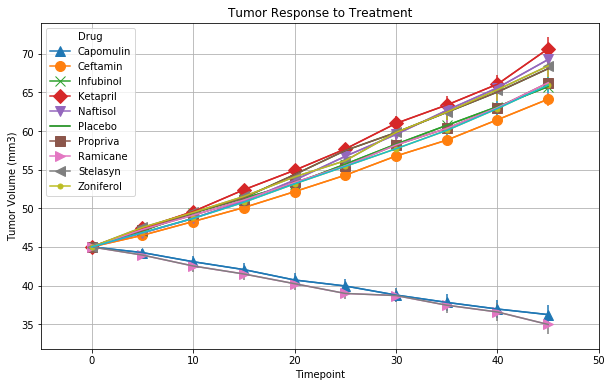

In [317]:
# Generate the Plot (with Error Bars)
#subset = mean_data_arrange.iloc[:,[0,2,3,5]]
#subset
fig = plt.figure()

ax = mean_data_arrange.plot(figsize=(10,6), yerr=std_data_arrange, legend=False)

ax.set_prop_cycle(None)

mean_data_arrange.plot(figsize=(10,6), style=['^-', 'o-', 'x-', 'D-', 'v-', 'g-', 's-', '>-', '<-', '.-'], markersize=10, ax= ax)


plt.title("Tumor Response to Treatment")

ax.set_ylabel("Tumor Volume (mm3)")

plt.grid()
plt.xlim(-5,50)
#plt.show()

plt.savefig('../Images/tumor_response_trmt.png')
#plt.close(fig)

## Metastatic Response to Treatment

In [283]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_sites = data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_sites= pd.DataFrame(tumor_sites["Metastatic Sites"].mean()).reset_index()

# Preview DataFrame
mean_sites.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [284]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint and convert to dataframe

se_sites = pd.DataFrame(tumor_sites["Metastatic Sites"].sem()).reset_index()

# Preview DataFrame
se_sites.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [285]:
se_sites_arrange = pd.DataFrame(se_sites.pivot(index="Timepoint", columns = "Drug"))
#se_sites_arrange.head()
se_sites_arrange.columns = se_sites_arrange.columns.droplevel(0)
se_sites_arrange.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [312]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_sites_arrange = pd.DataFrame(mean_sites.pivot(index="Timepoint", columns = "Drug"))

#mean_sites_arrange.head(20)
mean_sites_arrange.columns = mean_sites_arrange.columns.droplevel(0)
mean_sites_arrange.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


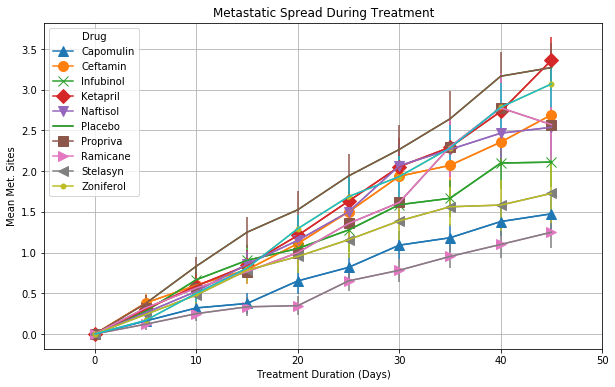

In [318]:
# Generate the Plot (with Error Bars)

#subset_sites = mean_sites_arrange.iloc[:,[0,2,3,5]]
#subset

ax = mean_sites_arrange.plot(figsize=(10,6), yerr=se_sites_arrange, legend=False)

ax.set_prop_cycle(None)

mean_sites_arrange.plot(figsize=(10,6), style=['^-', 'o-', 'x-', 'D-', 'v-', 'g-', 's-', '>-', '<-', '.-'], markersize=10, ax = ax)


plt.title("Metastatic Spread During Treatment")

ax.set_ylabel("Mean Met. Sites")
plt.xlabel("Treatment Duration (Days)")

plt.grid()
plt.xlim(-5,50)
#plt.show()

# Save the Figure
plt.savefig(("../Images/mean_met_sites.png"))


## Survival Rates

In [289]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped = data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mouse_survival= pd.DataFrame(grouped["Mouse ID"].count()).reset_index()
mouse_survival_rename = mouse_survival.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_survival_rename.head(10)



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [290]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
mouse_survival_arrange = pd.DataFrame(mouse_survival.pivot(index="Timepoint", columns = "Drug"))

mouse_survival_arrange.head()
mouse_survival_arrange.columns = mouse_survival_arrange.columns.droplevel(0)
col_keys = mouse_survival_arrange.keys()
mouse_survival_arrange.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


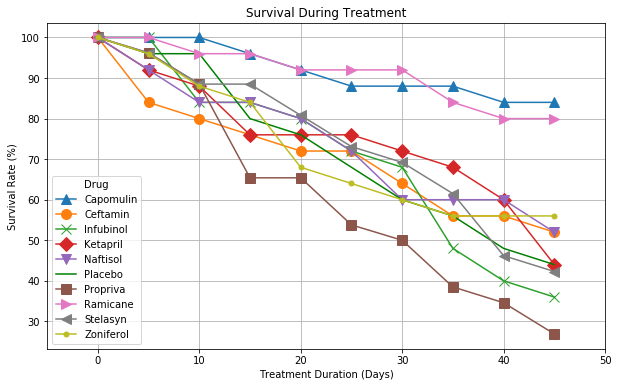

In [319]:
# Generate the Plot (Accounting for percentages)

percent = round(mouse_survival_arrange/mouse_survival_arrange.iloc[0,:]*100,1)
#print(percent)

ax = percent.plot(figsize=(10,6),style=['^-', 'o-', 'x-', 'D-', 'v-', 'g-', 's-', '>-', '<-', '.-'], markersize=10, legend=True)



#mean_sites_arrange.plot(figsize=(10,6), style=['^-', 'o-', 'x-', 'D-', 'v-', 'g-', 's', '1', '_', '.'], markersize=10, ax = ax)


plt.title("Survival During Treatment")

ax.set_ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")

plt.grid()
plt.xlim(-5,50)
#plt.show()

# Save the Figure
plt.savefig(("../Images/survival_rates.png"))


## Summary Bar Graph

In [293]:
# Calculate the percent changes of tumor volumes for each drug
#print(len(mean_data_arrange))
#print(mean_data_arrange)
df1 = mean_data_arrange.iloc[0, :]
df2 = mean_data_arrange.iloc[len(mean_data_arrange)-1, :]
percent_tumorvol_dec = pd.DataFrame(((df2 - df1)/df1)*100)
#percent_tumorvol_dec_ren = percent_tumorvol_dec.rename({"0": "percent_tumorvol_dec"}, axis=1)
percent_tumorvol_dec
#list(percent_tumorvol_dec_ren.columns)
percent_tumorvol_dec["positive"] = percent_tumorvol_dec.iloc[:, 0]>0
percent_tumorvol_dec






,0,positive
Drug,,
Capomulin,-19.475303,False
Ceftamin,42.516492,True
Infubinol,46.123472,True
Ketapril,57.028795,True
Naftisol,53.923347,True
Placebo,51.297960,True
Propriva,47.241175,True
Ramicane,-22.320900,False
Stelasyn,52.085134,True


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

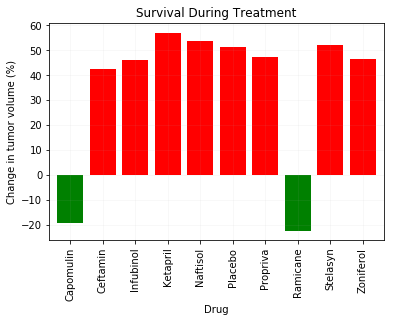

In [311]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()
ax = percent_tumorvol_dec.iloc[:,0].plot.bar(color=percent_tumorvol_dec["positive"].map({True: 'r', False: 'g'}), width=.8, legend=False)

plt.title("Survival During Treatment")

ax.set_ylabel("Change in tumor volume (%)")
plt.grid(alpha=0.1)
#for i in ax.patches:
 #   ax.text(i.get_width()+1000, i.get_y()+180, str(round((i.get_width()),1)), fontsize=20)
#plt.show()

plt.savefig(("../Images/tumor%change.png"))